In [29]:
#A1
# importing all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import math

# Reading the dataset
df = pd.read_csv("weatherAUS.csv")
df = pd.DataFrame(df)

# Function to remove null values
def remove_null_values(Class):
    iterate = df[Class]
    y = []
    mean = df[Class].mean(axis=0)
    for i in iterate:
        if math.isnan(i):
            y.append(mean)
        else:
            y.append(i)
    y = pd.DataFrame(y)
    df[Class] = y

# Remove null values for Pressure9am and Humidity9am
remove_null_values('Pressure9am')
remove_null_values('Humidity9am')

# Concatenating Pressure9am and Humidity9am to form feature set X
X = pd.concat([df['Pressure9am'], df['Humidity9am']], axis=1)

# Function to check if value is NaN
def is_NaN(string):
    return string != string

# Remove null values for RainToday
def remove_null_categorical(Class):
    iterate = df[Class]
    y = []
    most_freq = df[Class].value_counts().idxmax()
    for i in iterate:
        if is_NaN(i):
            y.append(most_freq)
        else:
            y.append(i)
    y = pd.DataFrame(y)
    df[Class] = y

remove_null_categorical('RainToday')
y = df['RainToday']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Applying KNN with K=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Training the model
neigh.fit(X_train, y_train)

# Prediction using the model
test_vector = neigh.predict(X_test)

# Displaying the confusion matrix and classification report
print(confusion_matrix(y_test, test_vector))
print(classification_report(y_test, test_vector))

# Calculating and displaying the accuracy of the model
testing_accuracy = neigh.score(X_test, y_test)
training_accuracy = neigh.score(X_train, y_train)
print('Testing Accuracy:', testing_accuracy)
print('Training Accuracy:', training_accuracy)

# Checking if the model fits the data well
print("Let's consider 80% as a good accuracy")
if training_accuracy < 0.80:
    print("Underfitting")
elif training_accuracy >= 0.80 and testing_accuracy >= 0.80:
    print("Good fitting")
elif testing_accuracy < 0.80:
    print("Overfitting")


[[49145  6295]
 [ 9941  5716]]
              precision    recall  f1-score   support

          No       0.83      0.89      0.86     55440
         Yes       0.48      0.37      0.41     15657

    accuracy                           0.77     71097
   macro avg       0.65      0.63      0.64     71097
weighted avg       0.75      0.77      0.76     71097

Testing Accuracy: 0.7716359340056542
Training Accuracy: 0.8260942950376955
Let's consider 80% as a good accuracy
Overfitting


In [44]:
#A2
#convert the excel contents to dataframe
df_lab = pd.read_excel("Lab Session1 Data.xlsx", sheet_name='Purchase data')
df_lab=pd.DataFrame(df_lab)

#convert datafram to array
Array_lab=df_lab.to_numpy()
A_mat=Array_lab[:,1:4]
C_mat=Array_lab[:,4:5]
#typecast the elements to float
A_mat=np.float64(A_mat)
#return the pseudoinverse
pinv_mat=np.linalg.pinv(A_mat)


#calculating the cost of each product
pinv2_mat=np.matmul(pinv_mat,C_mat)

#comparing real prices with the model for calculating prices
print("real prices:",C_mat)
predicted_price=np.matmul(A_mat,pinv2_mat)

#funtion to calculate MSE
def MSE(C,predicted):
    sum=0
    for i in range(len(C)):
        sub=0
        sub=C[i]-predicted[i]
        sub=sub*sub
        sum+=sub
    return sum/len(C)
print("Mean squared error:",MSE(C_mat,predicted_price))

#funtion to calculate RMSE
def RMSE(C,predicted):
    sum=0
    for i in range(len(C)):
        sub=0
        sub=C[i]-predicted[i]
        sub=sub*sub
        sum+=sub
    return math.sqrt(sum/len(C))
print("RMSE:",RMSE(C_mat,predicted_price))

#funtion to calculate MAPE
def MAPE(C,predicted):
    sum=0
    for i in range(len(C)):
        sub=0
        sub=C[i]-predicted[i]
        sub=abs((sub)/C[i])
        sum+=sub
    return sum/len(C)
print("MAPE:",MAPE(C_mat,predicted_price))

#funtion to calculate R2 score
def R2(C,predicted):
    rss=0
    for i in range(len(C)):
        error=0
        error=C[i]-predicted[i]
        rss += error*error
    tss=0
    mean=np.mean(predicted)
    for i in range(len(C)):
        error=0
        error=C[i]-mean
        tss += error*error   
    return 1-(rss/tss)
print("R2",R2(C_mat,predicted_price))

real prices: [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Mean squared error: [4.200526548120844e-27]
RMSE: 6.481146926371014e-14
MAPE: [1.739857520764079e-16]
R2 [1.0]


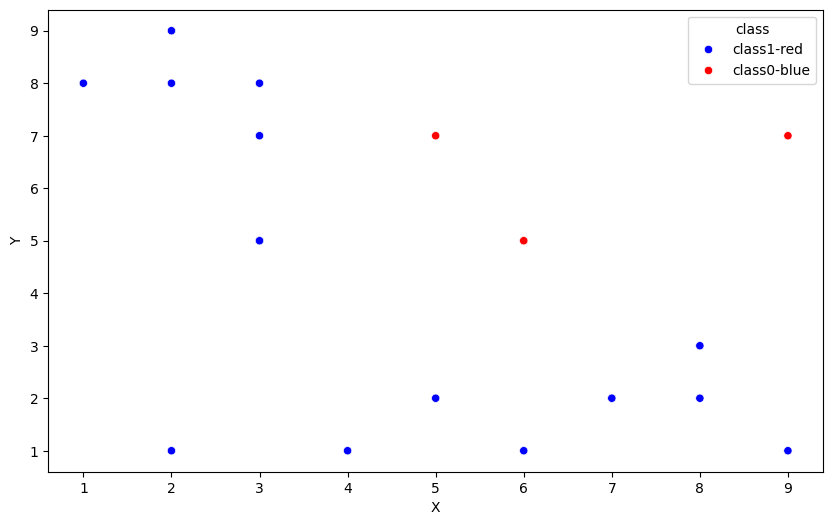

In [35]:
#A3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate 20 random data points for X and Y
data = {'X': np.random.randint(1, 10, 20), 'Y': np.random.randint(1, 10, 20)}

df = pd.DataFrame(data)

# Create a condition for class0-blue and class1-red
df['class'] = np.where((df['X'] >= 5) & (df['Y'] >= 5), 'class0-blue', 'class1-red')

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='class', data=df, palette=['blue', 'red'])
plt.show()



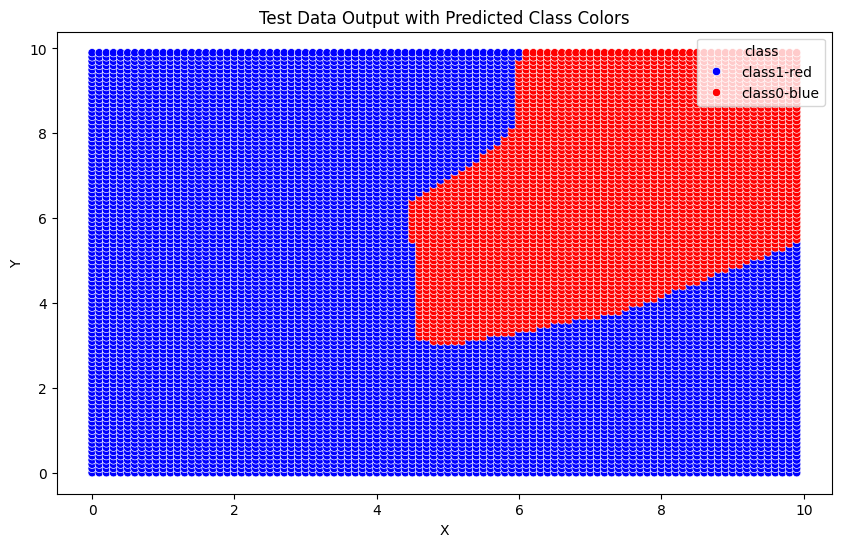

For diiferent k values


<Figure size 1500x1000 with 0 Axes>

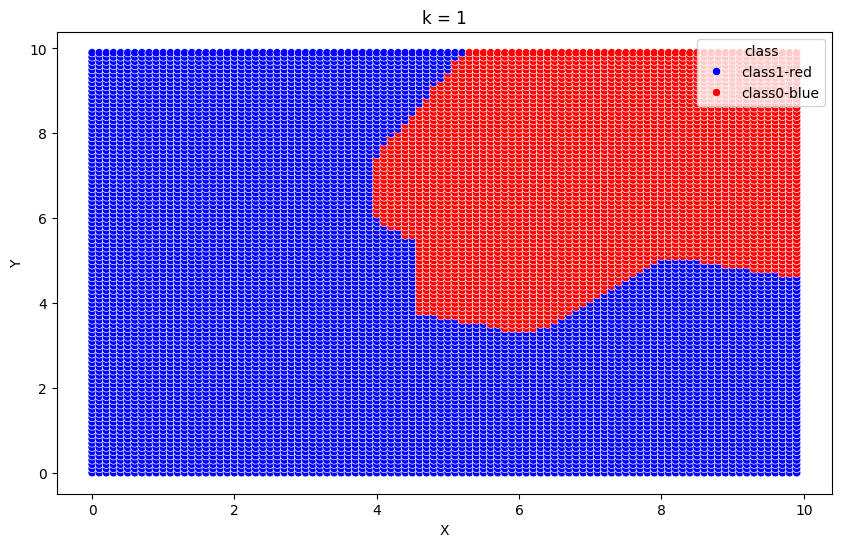

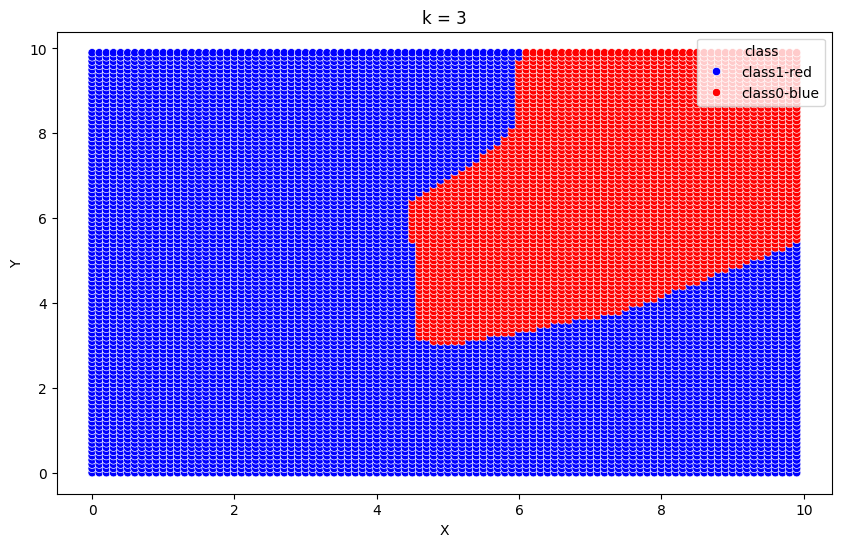

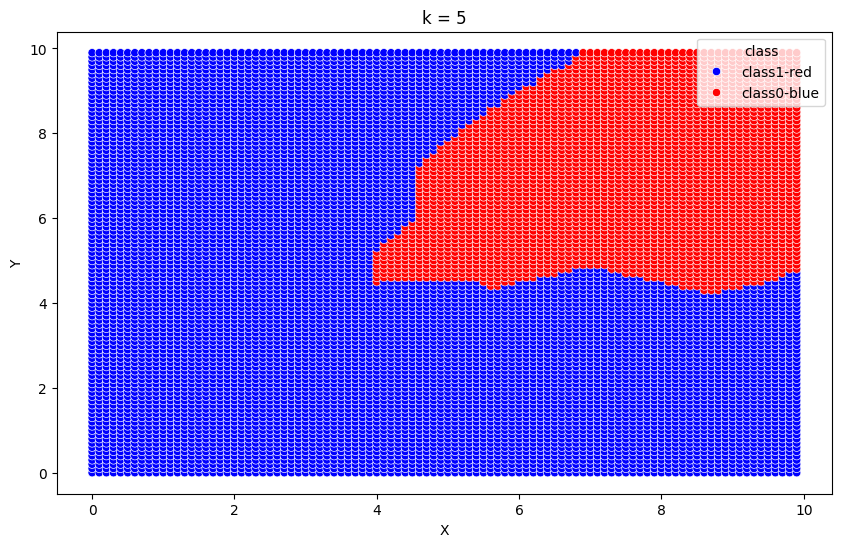

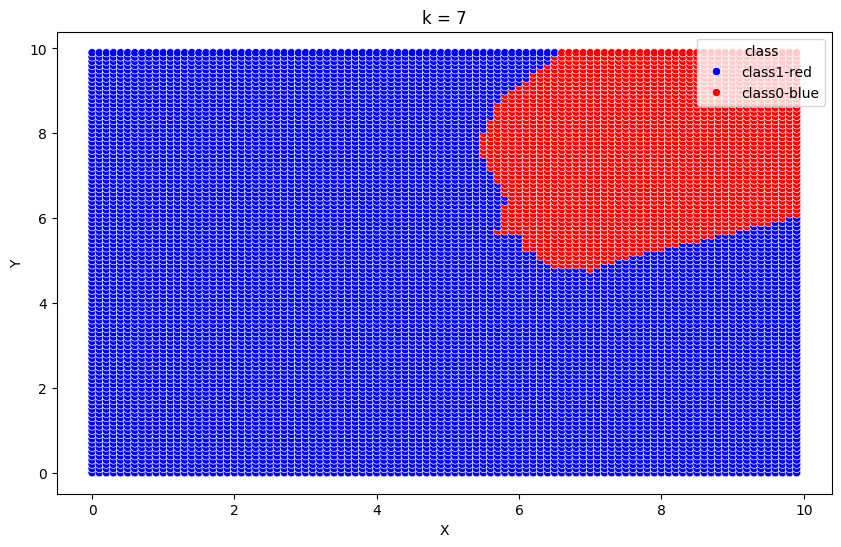

In [36]:
#A4
X_test = np.mgrid[0:10:0.1, 0:10:0.1].reshape(2,-1).T

# Prepare training data
X_train = df[['X', 'Y']].values
y_train = np.where(df['class'] == 'class0-blue', 0, 1)

# Create and train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict classes for test set
y_test = knn.predict(X_test)

# Create a dataframe for test set
df_test = pd.DataFrame(X_test, columns=['X', 'Y'])
df_test['class'] = np.where(y_test == 0, 'class0-blue', 'class1-red')

# Plot the test data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='class', data=df_test, palette=['blue', 'red'])
plt.title('Test Data Output with Predicted Class Colors')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
#A5
# Define a range of k values to test
print("For diiferent k values")
k_values = [1, 3, 5, 7]

# Plot the test data for different k values
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    # Create and train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict classes for test set
    y_test = knn.predict(X_test)

    # Create a dataframe for test set
    df_test = pd.DataFrame(X_test, columns=['X', 'Y'])
    df_test['class'] = np.where(y_test == 0, 'class0-blue', 'class1-red')

    # Plot subplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='X', y='Y', hue='class', data=df_test, palette=['blue', 'red'])
    plt.title(f'k = {k}')
    plt.xlabel('X')
    plt.ylabel('Y')


plt.show()

For diiferent k values


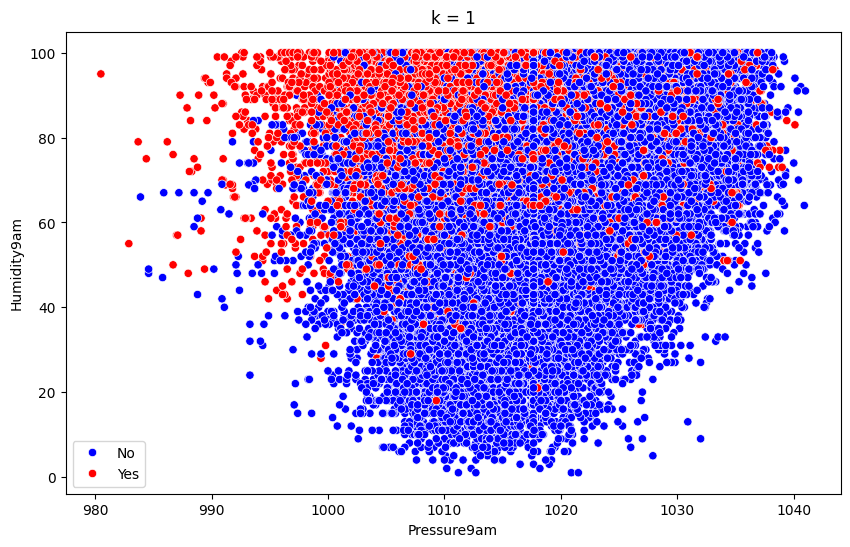

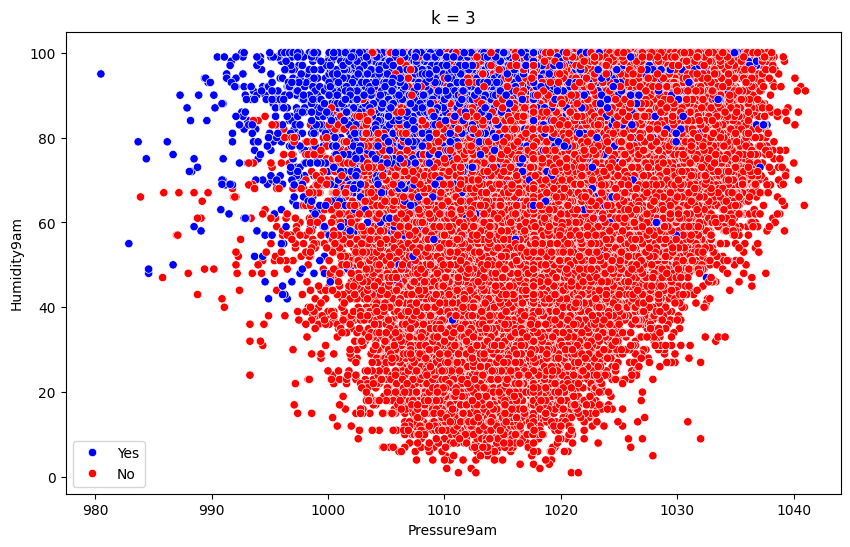

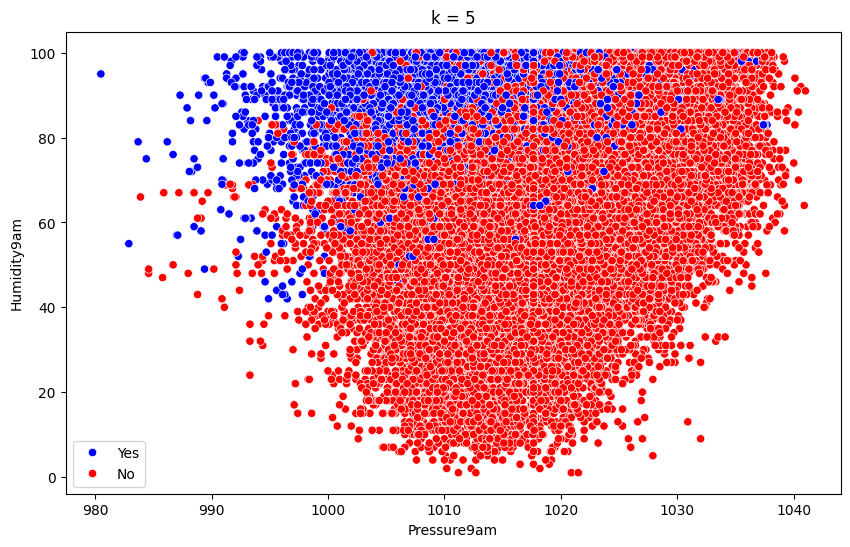

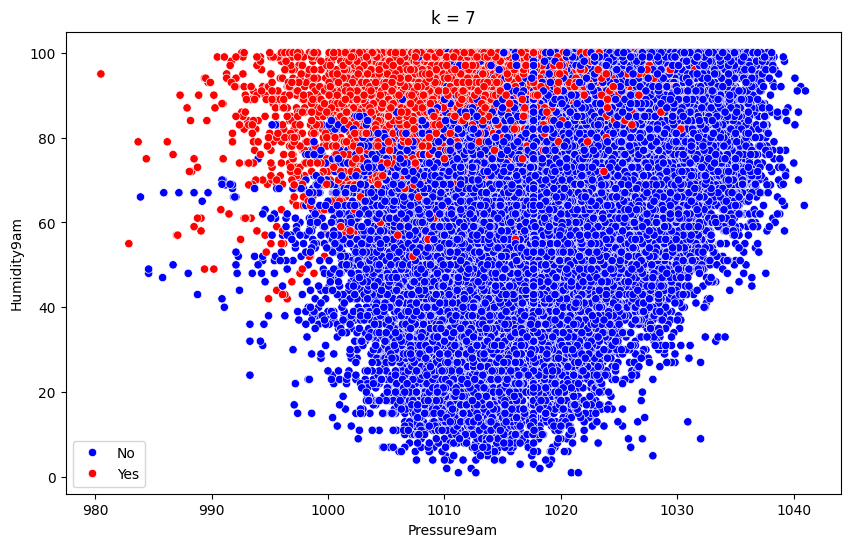

In [33]:
#A6
# Reading the dataset
df = pd.read_csv("weatherAUS.csv")
df = pd.DataFrame(df)

# Function to remove null values
def remove_null_values(Class):
    iterate = df[Class]
    y = []
    mean = df[Class].mean(axis=0)
    for i in iterate:
        if math.isnan(i):
            y.append(mean)
        else:
            y.append(i)
    y = pd.DataFrame(y)
    df[Class] = y

# Remove null values for Pressure9am and Humidity9am
remove_null_values('Pressure9am')
remove_null_values('Humidity9am')

# Concatenating Pressure9am and Humidity9am to form feature set X
X = pd.concat([df['Pressure9am'], df['Humidity9am']], axis=1)

# Function to check if value is NaN
def is_NaN(string):
    return string != string

# Remove null values for RainToday
def remove_null_categorical(Class):
    iterate = df[Class]
    y = []
    most_freq = df[Class].value_counts().idxmax()
    for i in iterate:
        if is_NaN(i):
            y.append(most_freq)
        else:
            y.append(i)
    y = pd.DataFrame(y)
    df[Class] = y

remove_null_categorical('RainToday')
y = df['RainToday']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print("For diiferent k values")
k_values = [1, 3, 5, 7]
for i, k in enumerate(k_values, 1):
   neigh = KNeighborsClassifier(n_neighbors=k)

   # Training the model
   neigh.fit(X_train, y_train)
   df_test = pd.DataFrame(X_test, columns=['Pressure9am', 'Humidity9am'])
   
   # Plotting with predictions made by the classifier
   plt.figure(figsize=(10, 6))
   sns.scatterplot(x='Pressure9am', y='Humidity9am', hue=neigh.predict(X_test), data=df_test, palette=['blue', 'red'])
   plt.title(f'k = {k}')
   plt.xlabel('Pressure9am')
   plt.ylabel('Humidity9am')
   plt.show() 

  

In [45]:
#A7
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randInt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Define the KNN classifier
neigh = KNeighborsClassifier()

# Defining the parameters to search
parameters = {'n_neighbors': sp_randInt(1, 100)}

# Call RandomizedSearchCV to tune the hyperparameters
clf = RandomizedSearchCV(neigh, param_distributions=parameters, random_state=0)
search = clf.fit(X_train, y_train)

# Print the best K value
print("Best K value:", search.best_params_['n_neighbors'])

# Use the best parameters to train the model
best_neigh = KNeighborsClassifier(n_neighbors=search.best_params_['n_neighbors'])
best_neigh.fit(X_train, y_train)

# Evaluate the model
accuracy = best_neigh.score(X_test, y_test)
print("Accuracy:", accuracy)

Best K value: 68
Accuracy: 0.8082338213989338
